In [1]:
#Plot for the duopoly price discrimination model with loyalty and costs: Infinite horizon Mult Loyalty LL case
#this is applicable only for uniform F and when delta_a = delta_b = delta_F (hardcode)
#naming convention: _fm_ means firms are 'f'orward looking and customers are 'm'yopic

%load_ext autoreload
%autoreload 2
from utils.imports import *
from utils.infinite_horizon import ll_get_metric_arrs_vs_camcb
from utils.utils import *

In [2]:
#keep cb fixed
flag_theory = True
flag_plot = True
flag_retrieve_stored_df = False
flag_store_df = False
cb     = 0.2
la     =   3
lb     =   4
sa     =   1.1
sb     =   0.5
deltaf = 0.4 #common discount function
dist = 'uniform'
npts=100
if flag_theory:
    fprefix = "ll_ih_fm_unc" #signifying 'unconsrtained prices'
    ca_arr = np.linspace(cb+.4,2,10) #ensure ca >= cb
else:
    fprefix = "ll_ih_fm_c" #signifying 'consrtained prices'
    ca_arr = np.linspace(cb,4,20) #ensure ca >= cb
ca_m_cb_arr = ca_arr - cb
maxpx=ca_arr.max()+5

In [3]:
if flag_retrieve_stored_df is True:
    df = pd.read_pickle(fprefix+'.pkl')
else:
    df = ll_get_metric_arrs_vs_camcb(dist,deltaf, ca_arr,cb,la,lb,sa,sb,flag_theory=flag_theory,maxpx=maxpx,npts=npts,show_progress=False,plot_path=False)
    if flag_store_df is True:
        df.to_pickle(fprefix+'.pkl')

ll_get_metric_arrs_vs_camcb start:  2021-09-27 15:39:49.644930
i,ca,time:  0 0.6 2021-09-27 15:39:49.645918
i,ca,time:  1 0.756 2021-09-27 15:39:49.677452
i,ca,time:  2 0.911 2021-09-27 15:39:49.707448
i,ca,time:  3 1.067 2021-09-27 15:39:49.735464
i,ca,time:  4 1.222 2021-09-27 15:39:49.762470
i,ca,time:  5 1.378 2021-09-27 15:39:49.789476
i,ca,time:  6 1.533 2021-09-27 15:39:49.817483
i,ca,time:  7 1.689 2021-09-27 15:39:49.843488
i,ca,time:  8 1.844 2021-09-27 15:39:49.873496
i,ca,time:  9 2.0 2021-09-27 15:39:49.904032
ll_get_metric_arrs_vs_camcb end:  2021-09-27 15:39:49.930572


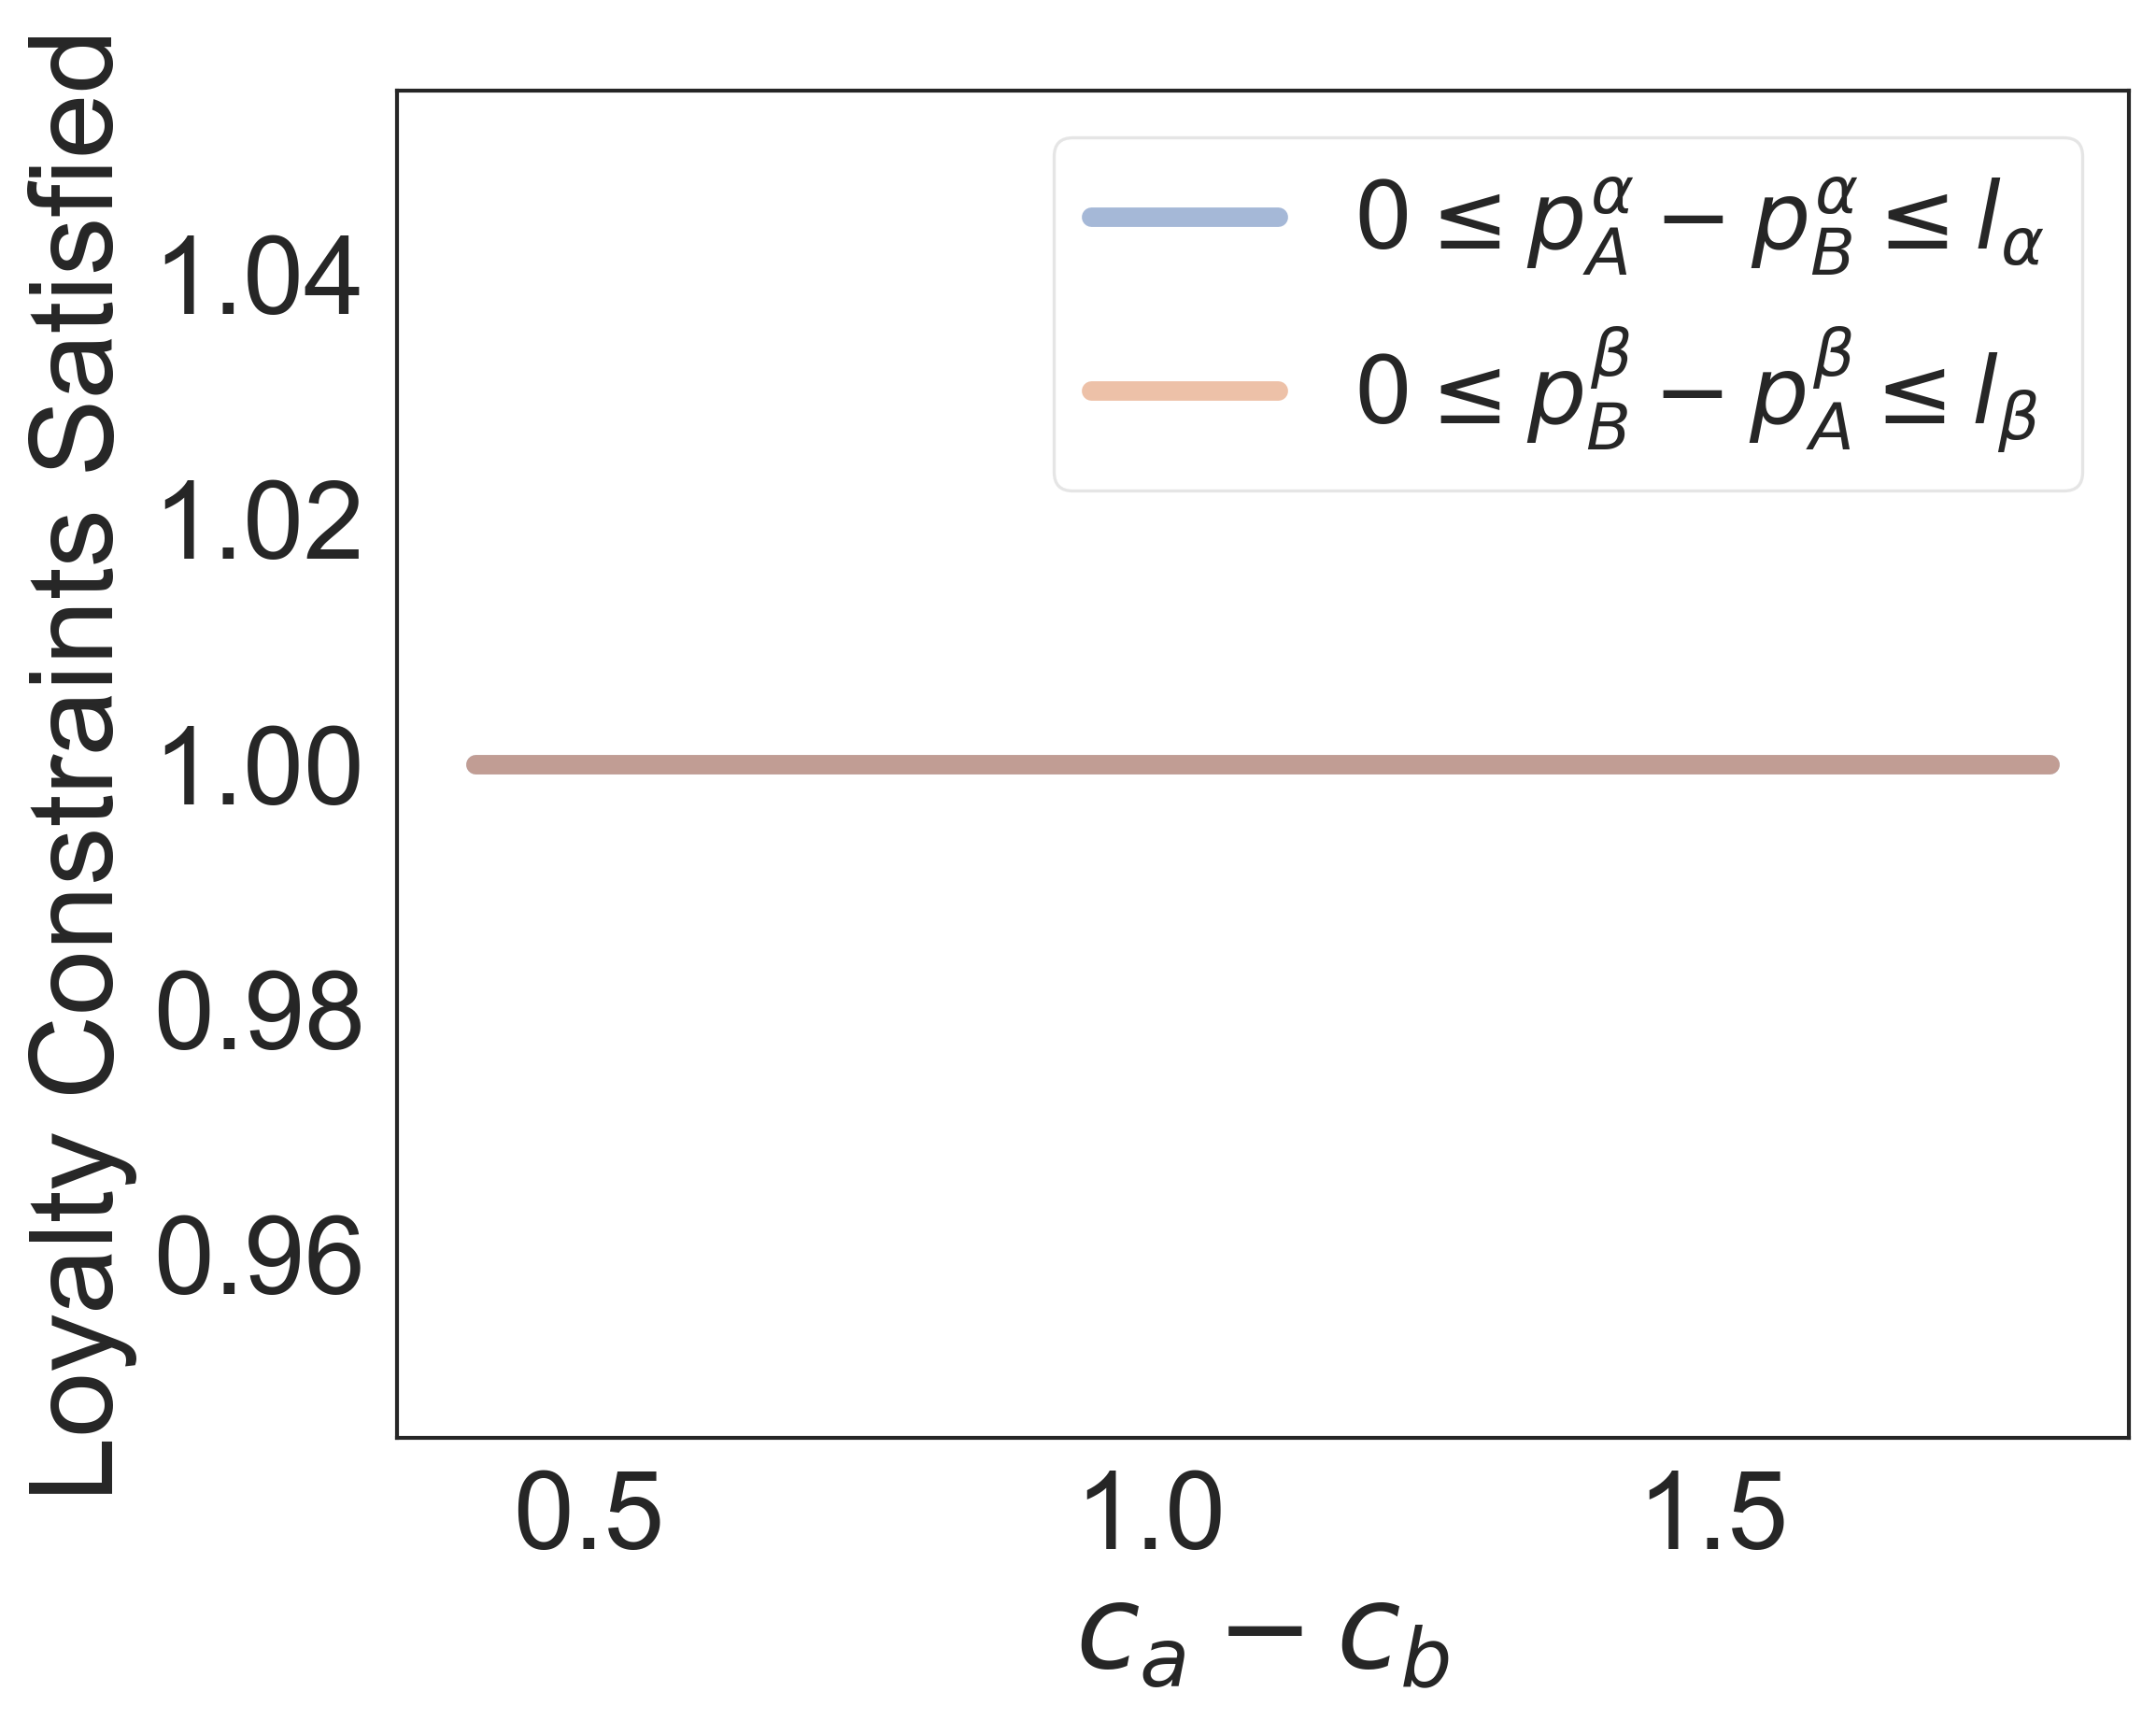

In [4]:
# plot of price constraints indicator functions
labels_constraints_loyalty=[r'$0 \leq p_{A}^{\alpha} - p_{B}^{\alpha} \leq l_{\alpha}$',r'$0 \leq p_{B}^{\beta} - p_{A}^{\beta} \leq l_{\beta}$']
fname_constraints_loyalty = "ll_constraints_loyalty.png" if flag_plot else None
plot_curves_vs_camcb(df['constraint_aa_ba_arr'],df['constraint_bb_ab_arr'],ca_m_cb_arr,'Loyalty Constraints Satisfied',labels_constraints_loyalty,None,None,fname_constraints_loyalty)

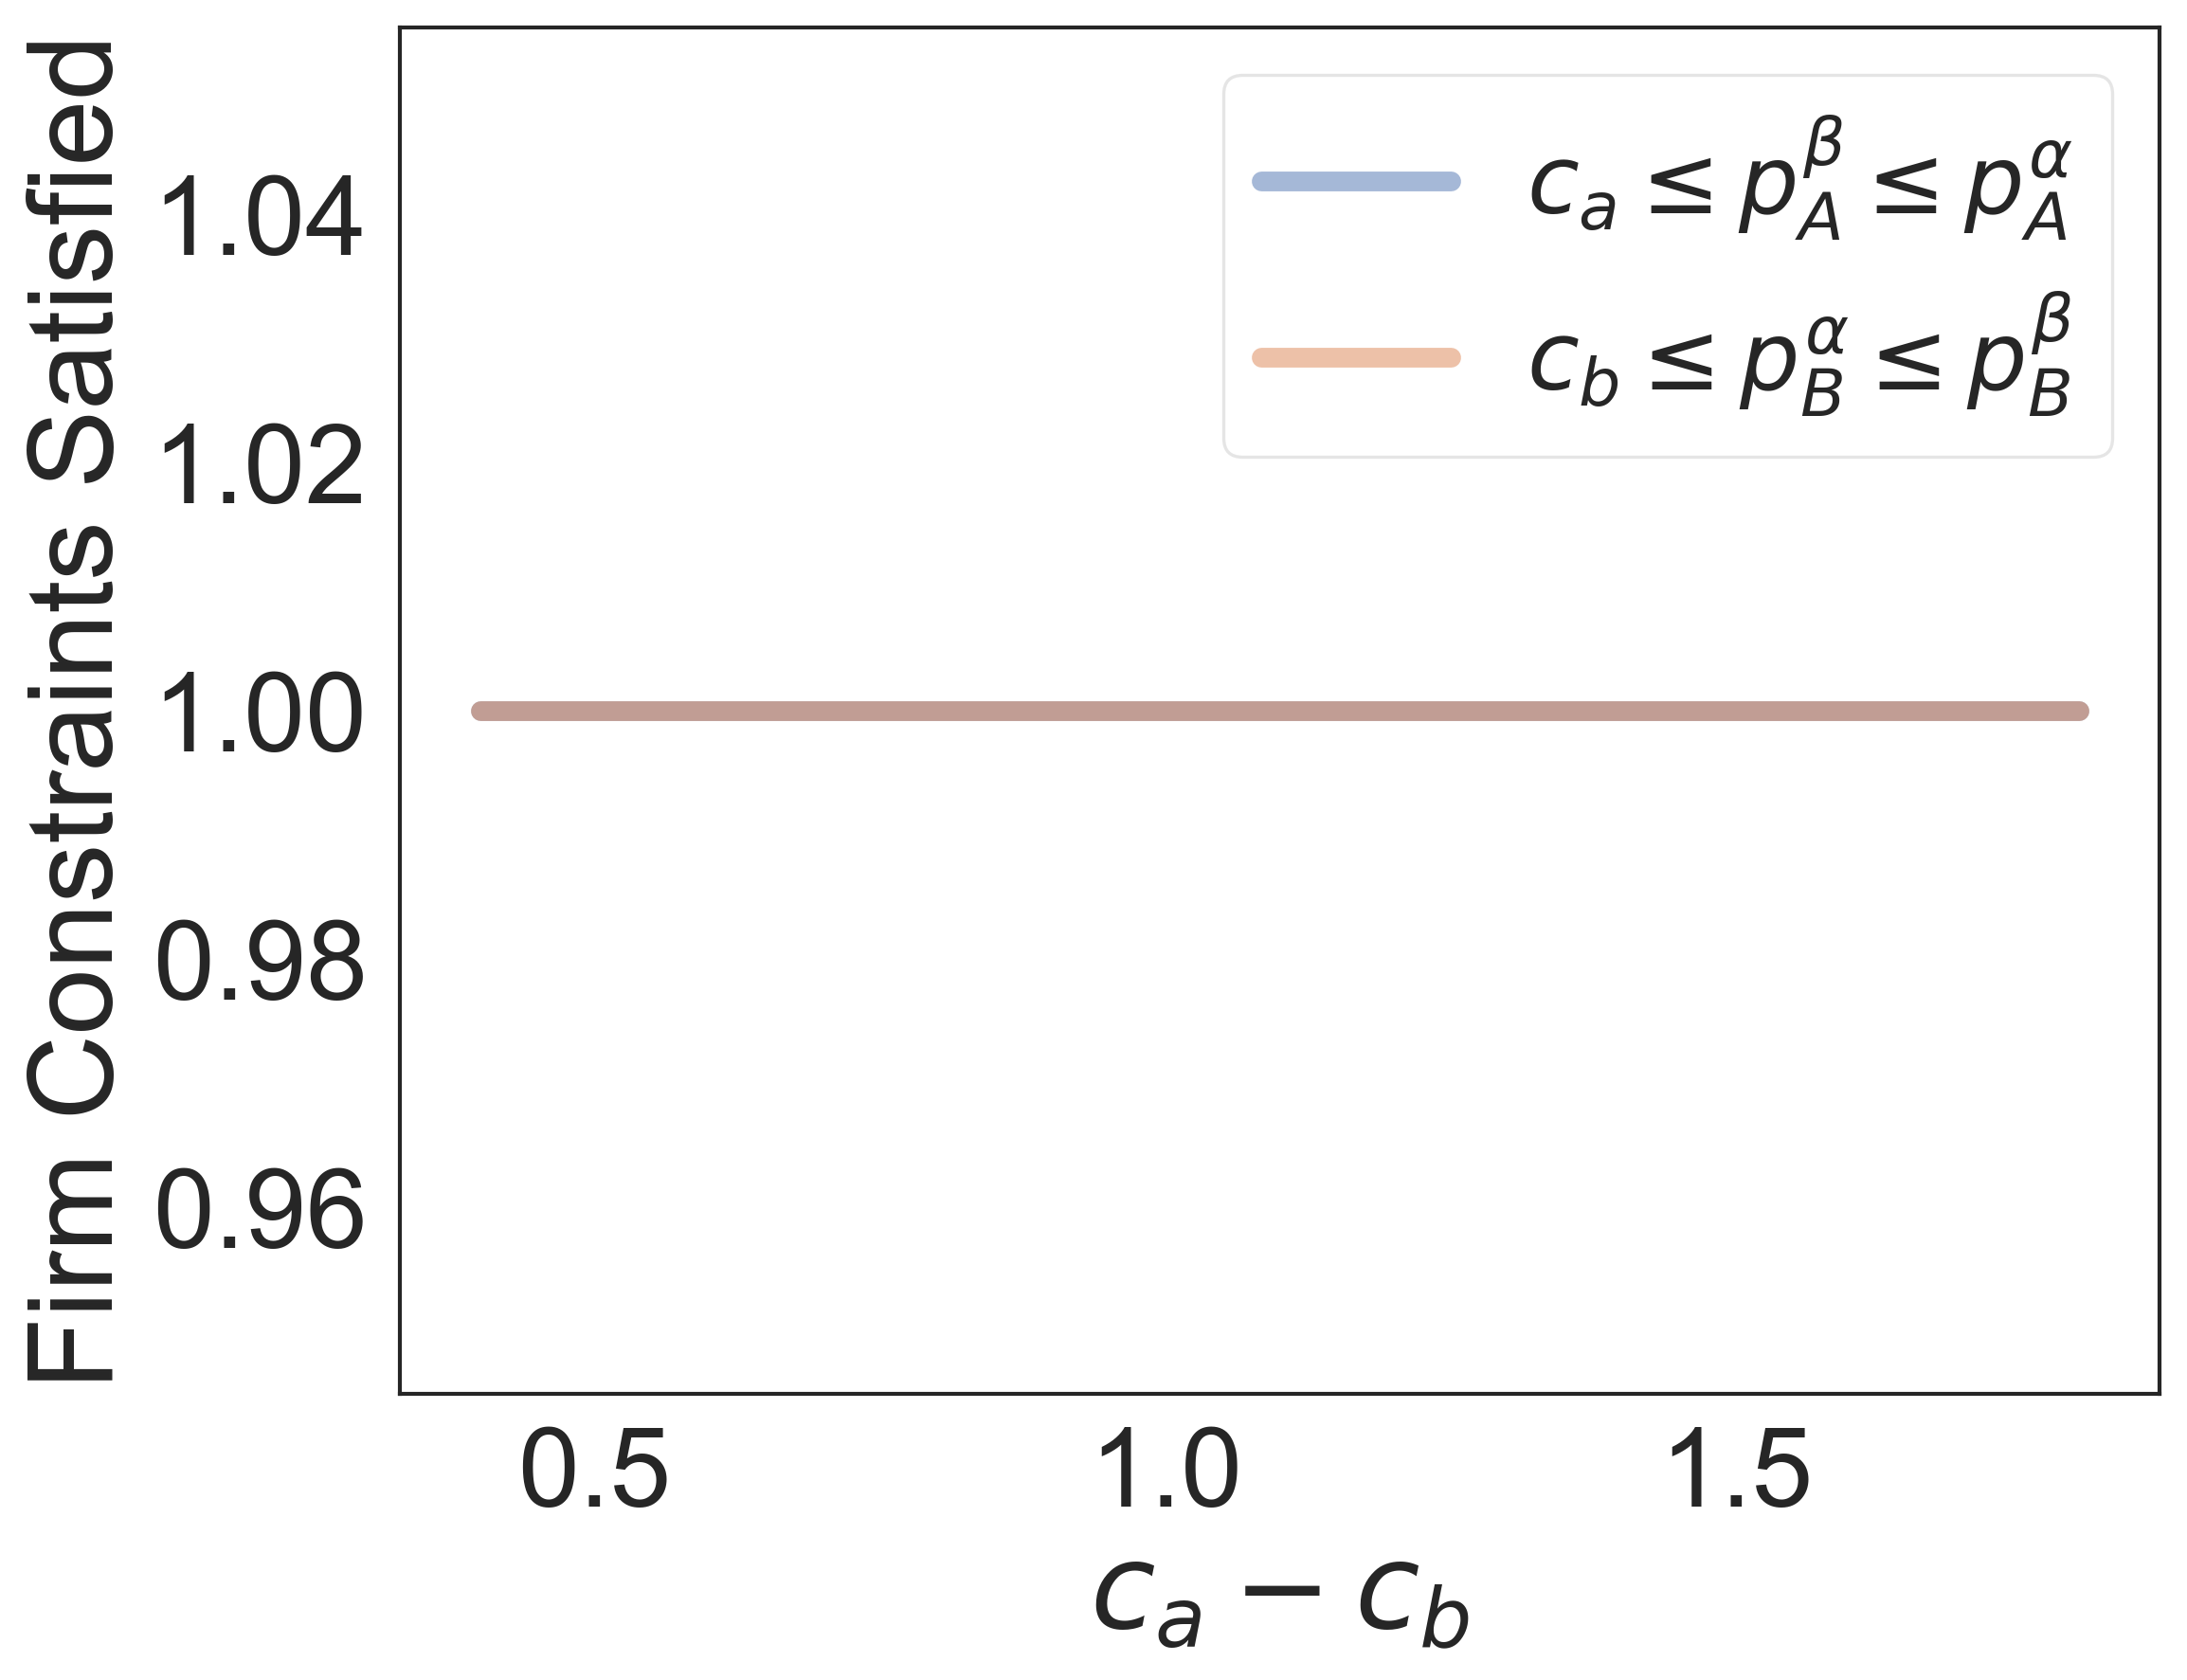

In [5]:
# plot of price constraints indicator functions
labels_constraints_firm=[r'$c_a \leq p_{A}^{\beta} \leq p_{A}^{\alpha}$',r'$c_b \leq p_{B}^{\alpha} \leq p_{B}^{\beta}$']
fname_constraints_firm = "ll_constraints_firm.png" if flag_plot else None
plot_curves_vs_camcb(df['constraint_cross_a_arr'],df['constraint_cross_a_arr'],ca_m_cb_arr,'Firm Constraints Satisfied',labels_constraints_firm,None,None,fname_constraints_firm)

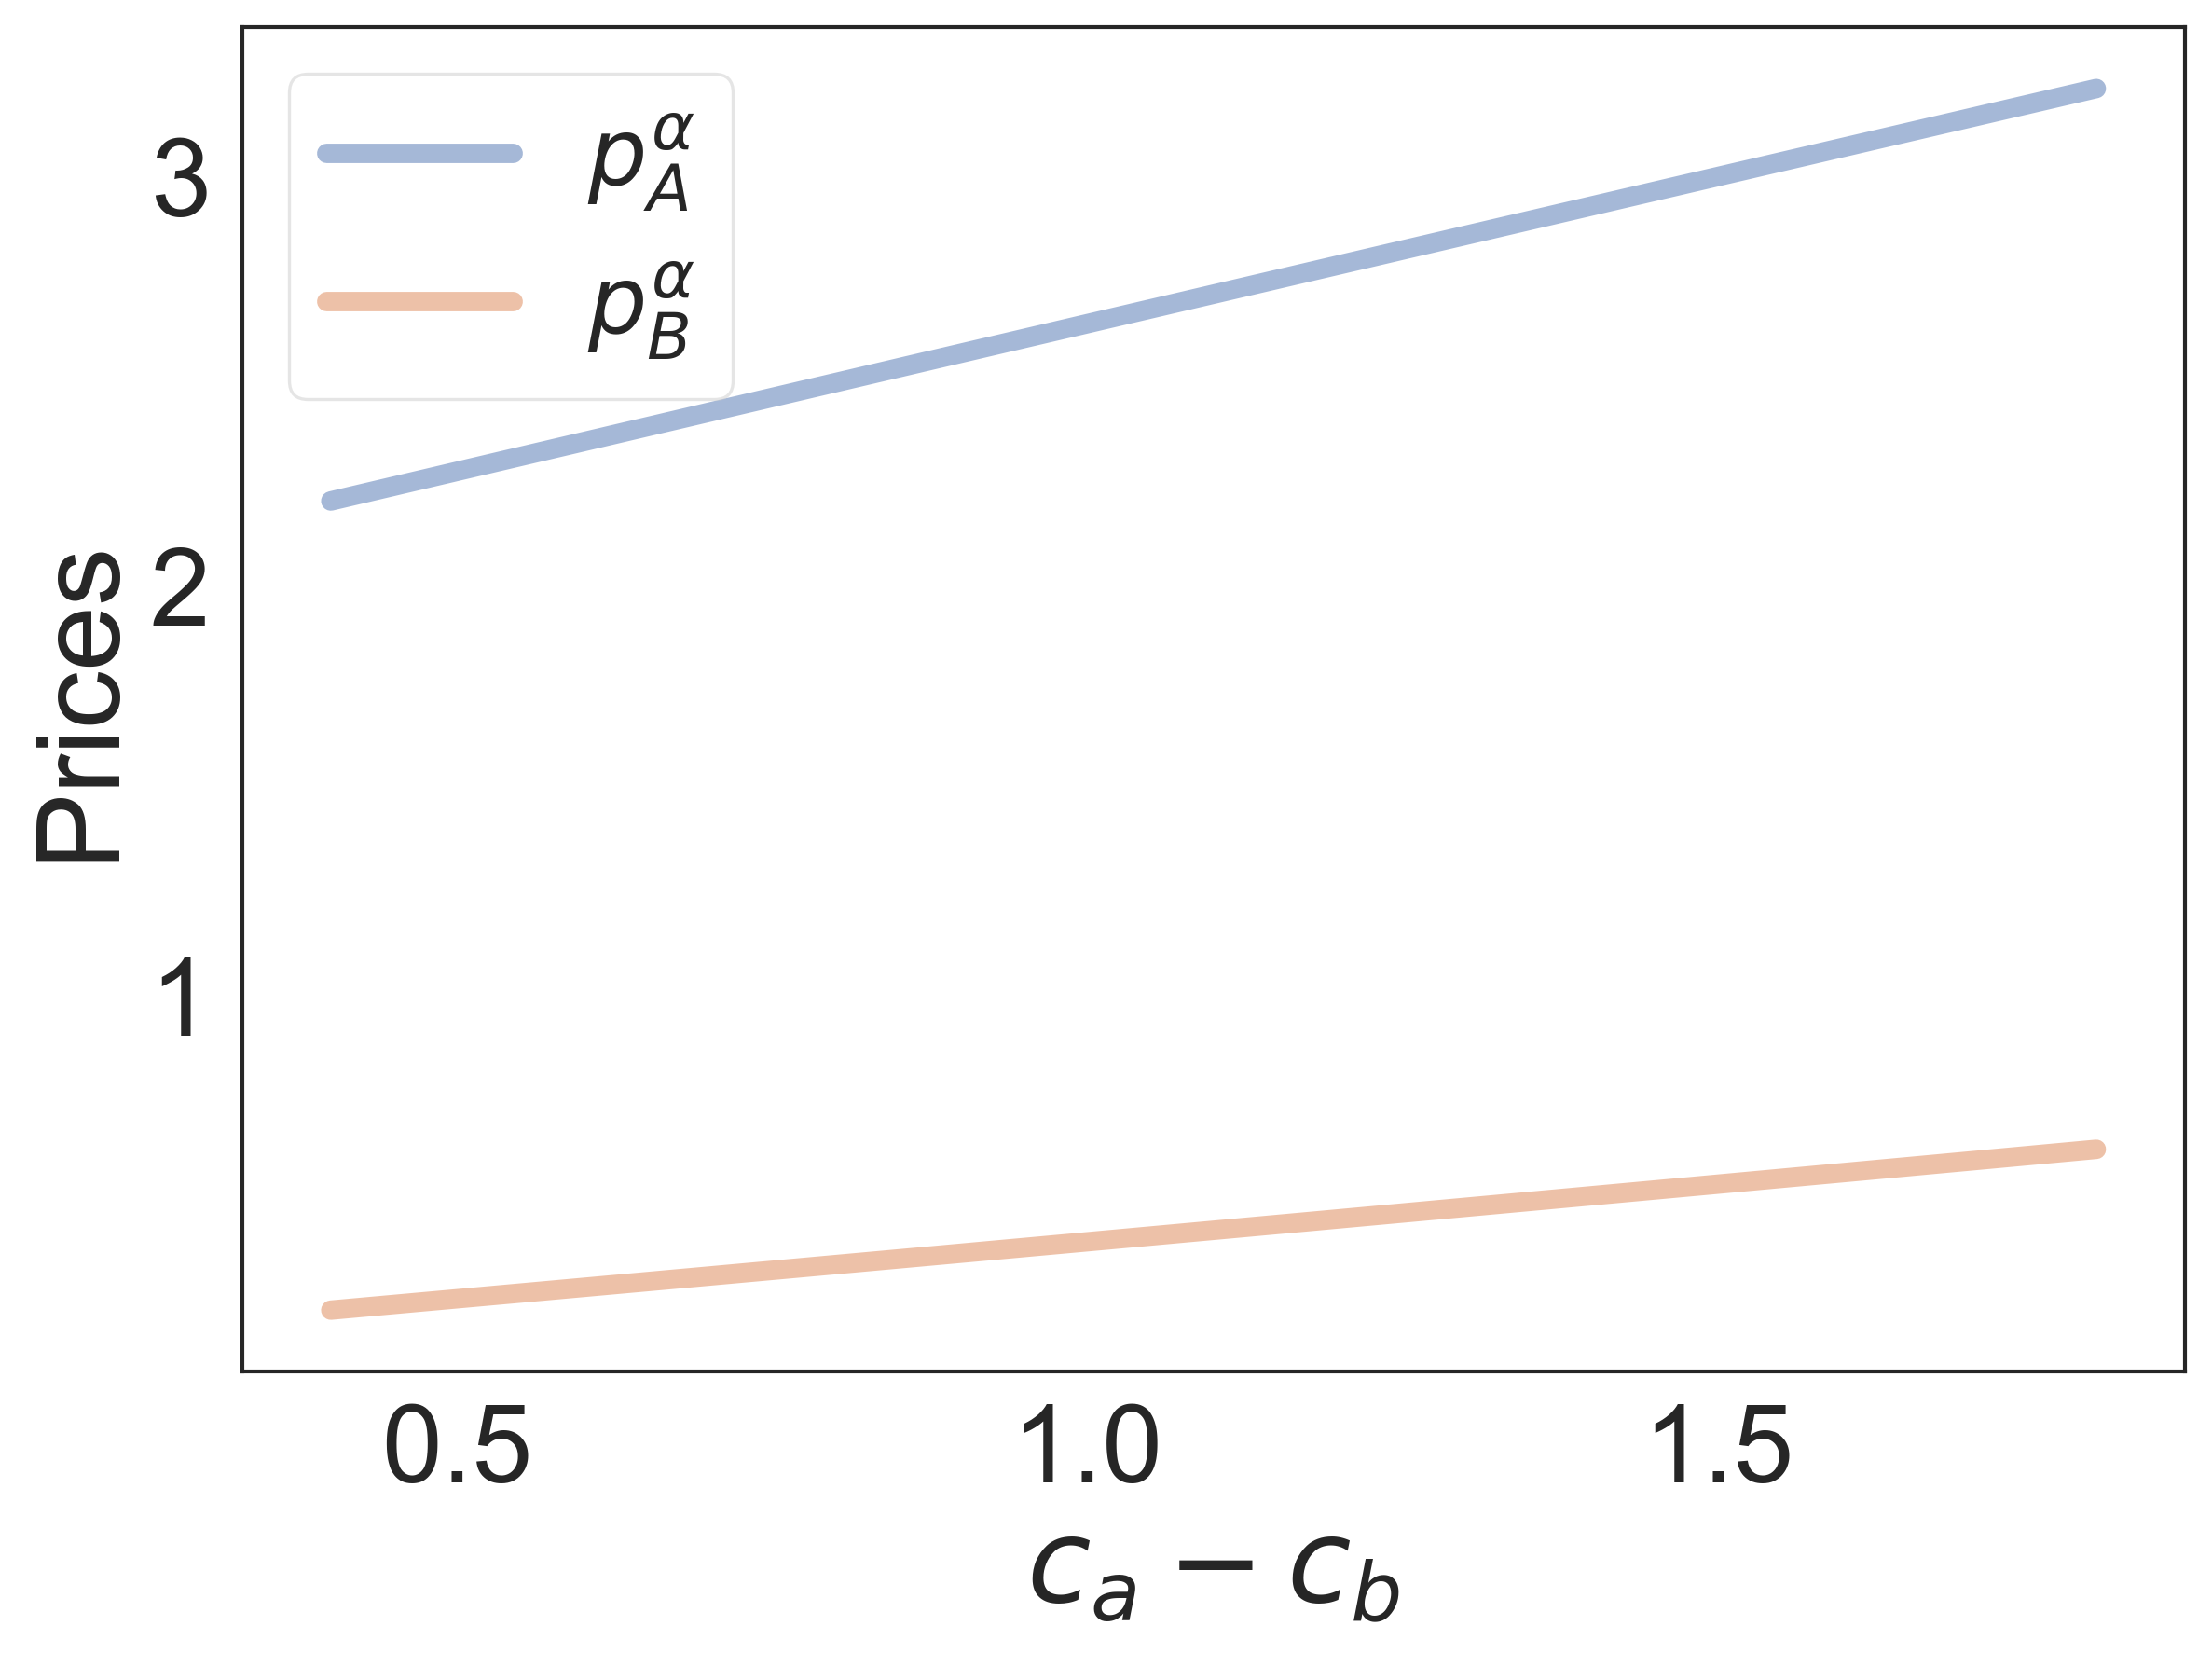

In [6]:
# plot of prices paa and pba
labels_prices_a=[r'$p_{A}^{\alpha}$',r'$p_{B}^{\alpha}$']
fname_prices_a = "ll_ih_fm_unc_paa_pba.png" if flag_plot else None
plot_curves_vs_camcb(df['paa'],df['pba'],ca_m_cb_arr,'Prices',labels_prices_a,None,None,fname_prices_a)

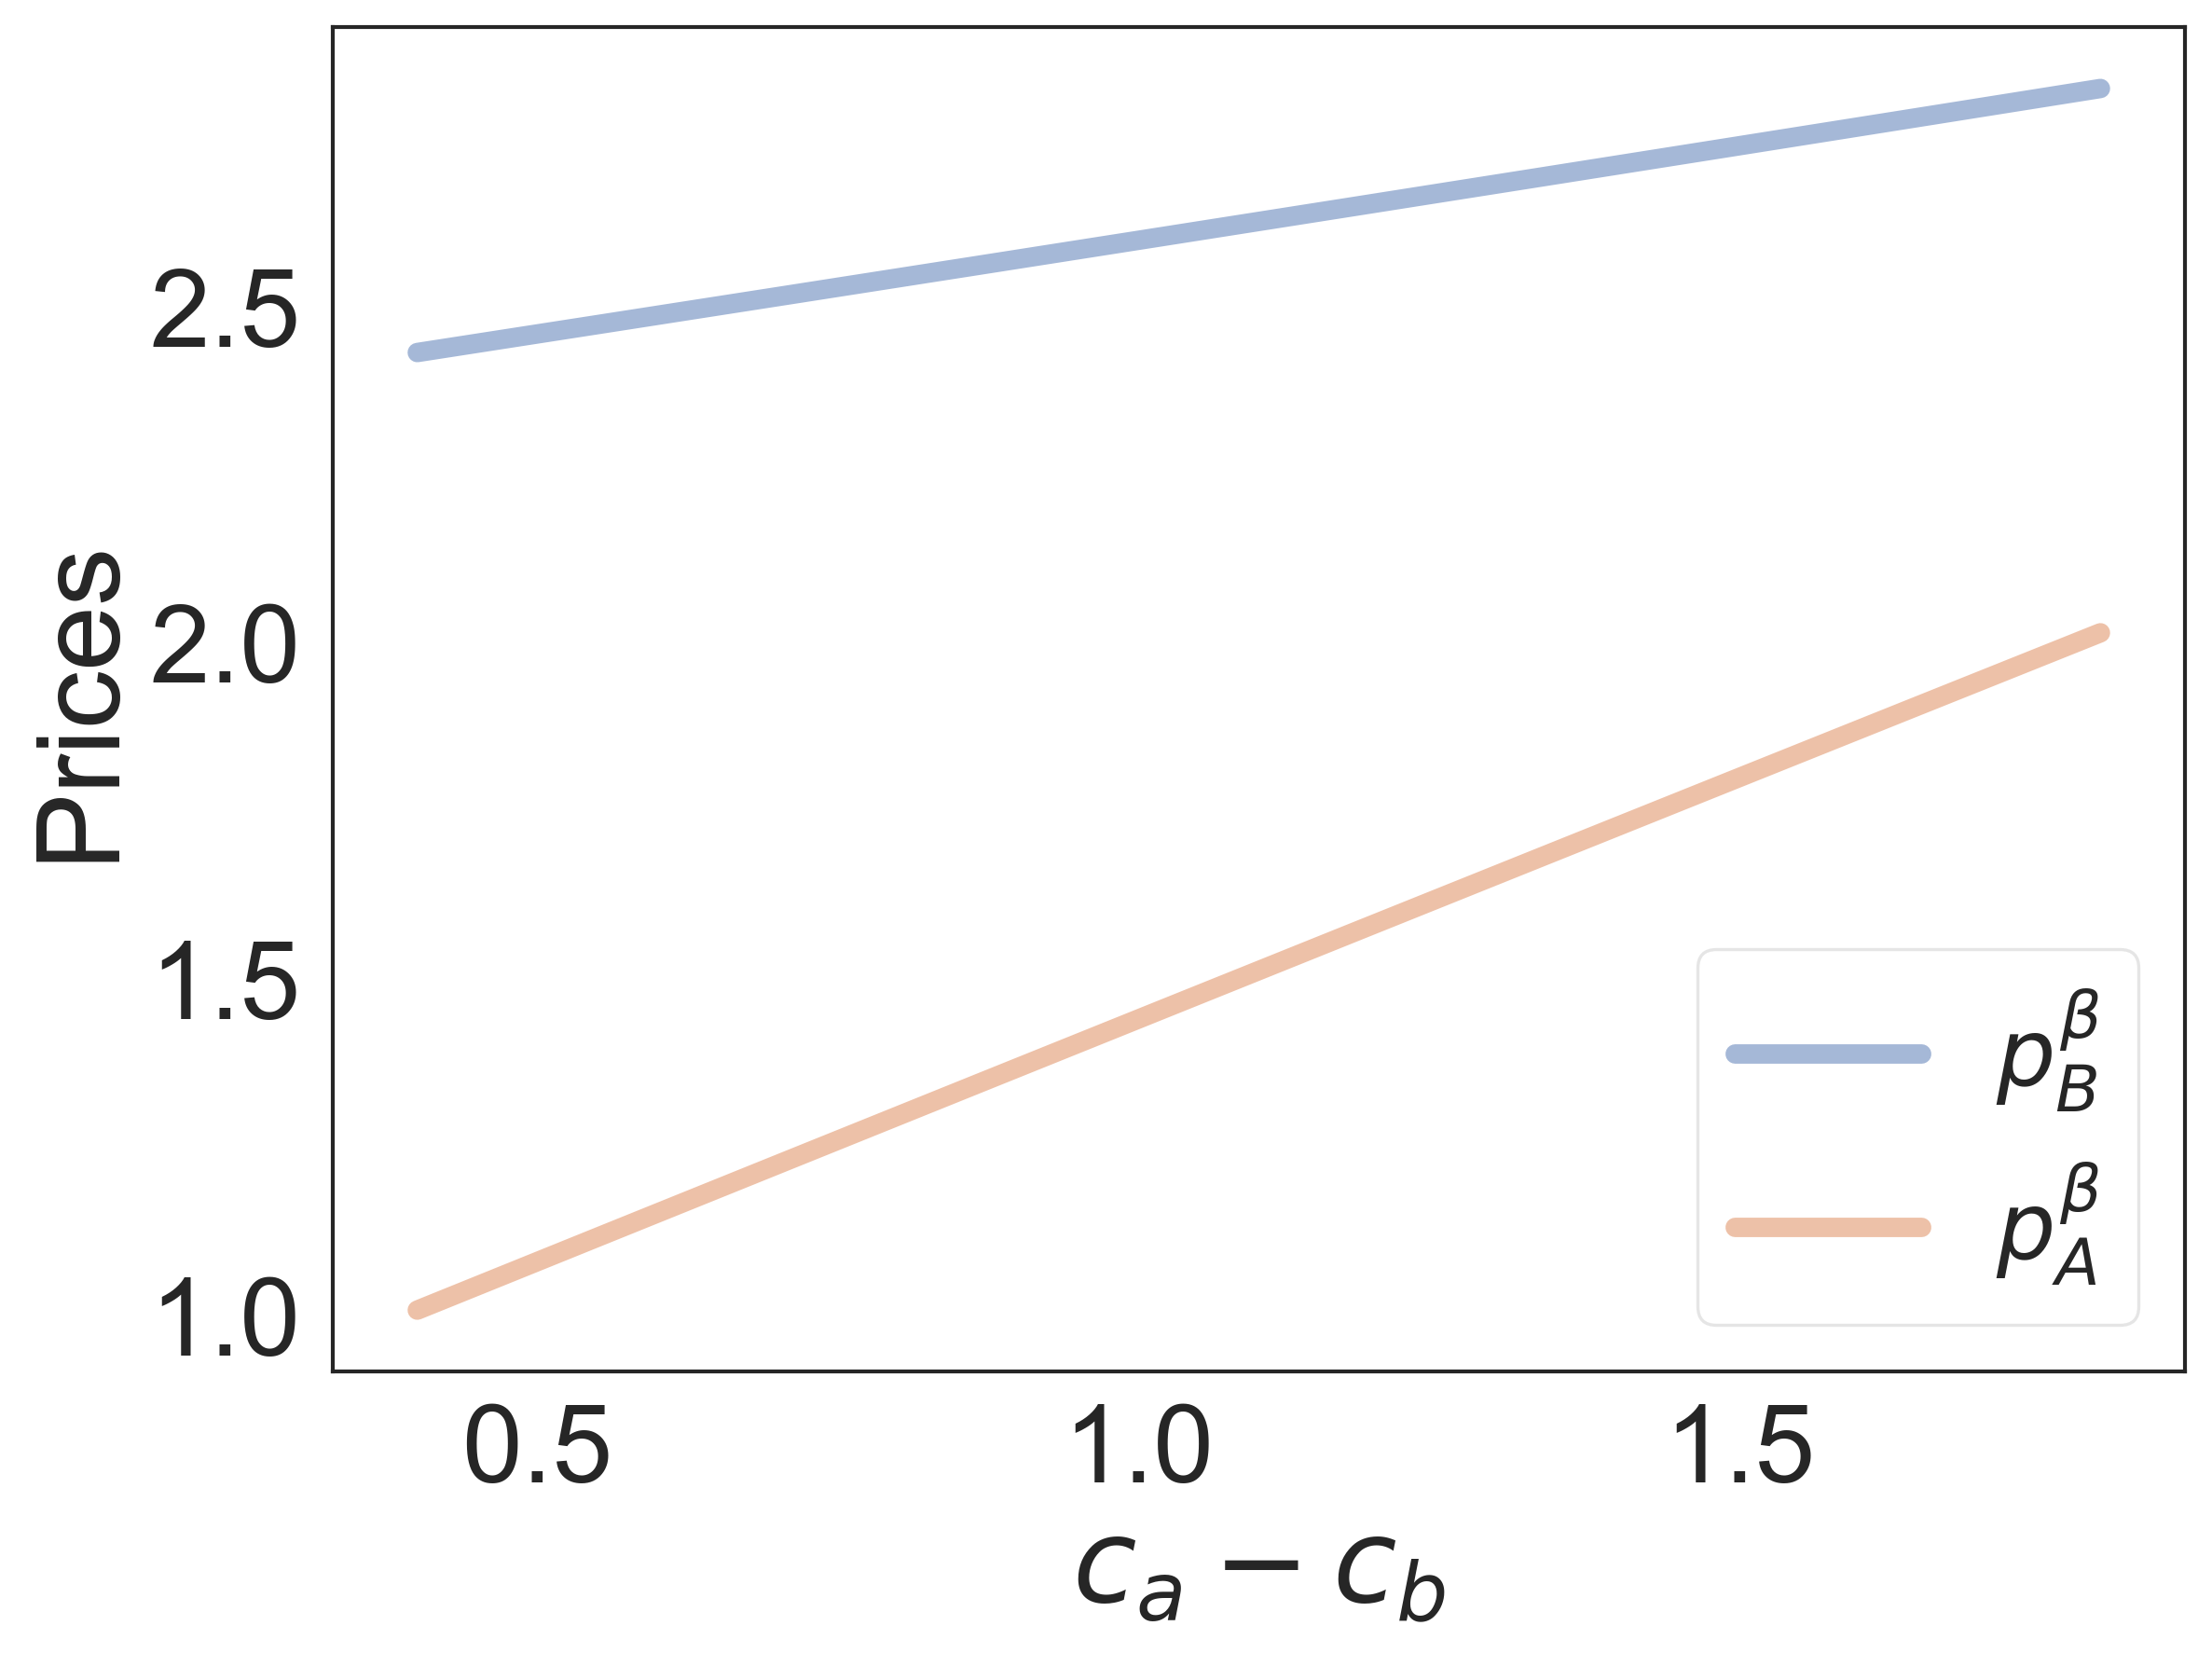

In [7]:
# plot of prices pbb and pab
labels_prices_b=[r'$p_{B}^{\beta}$',r'$p_{A}^{\beta}$']
fname_prices_b = "ll_ih_fm_unc_pbb_pab.png" if flag_plot else None
plot_curves_vs_camcb(df['pbb'],df['pab'],ca_m_cb_arr,'Prices',labels_prices_b,None,None,fname_prices_b)

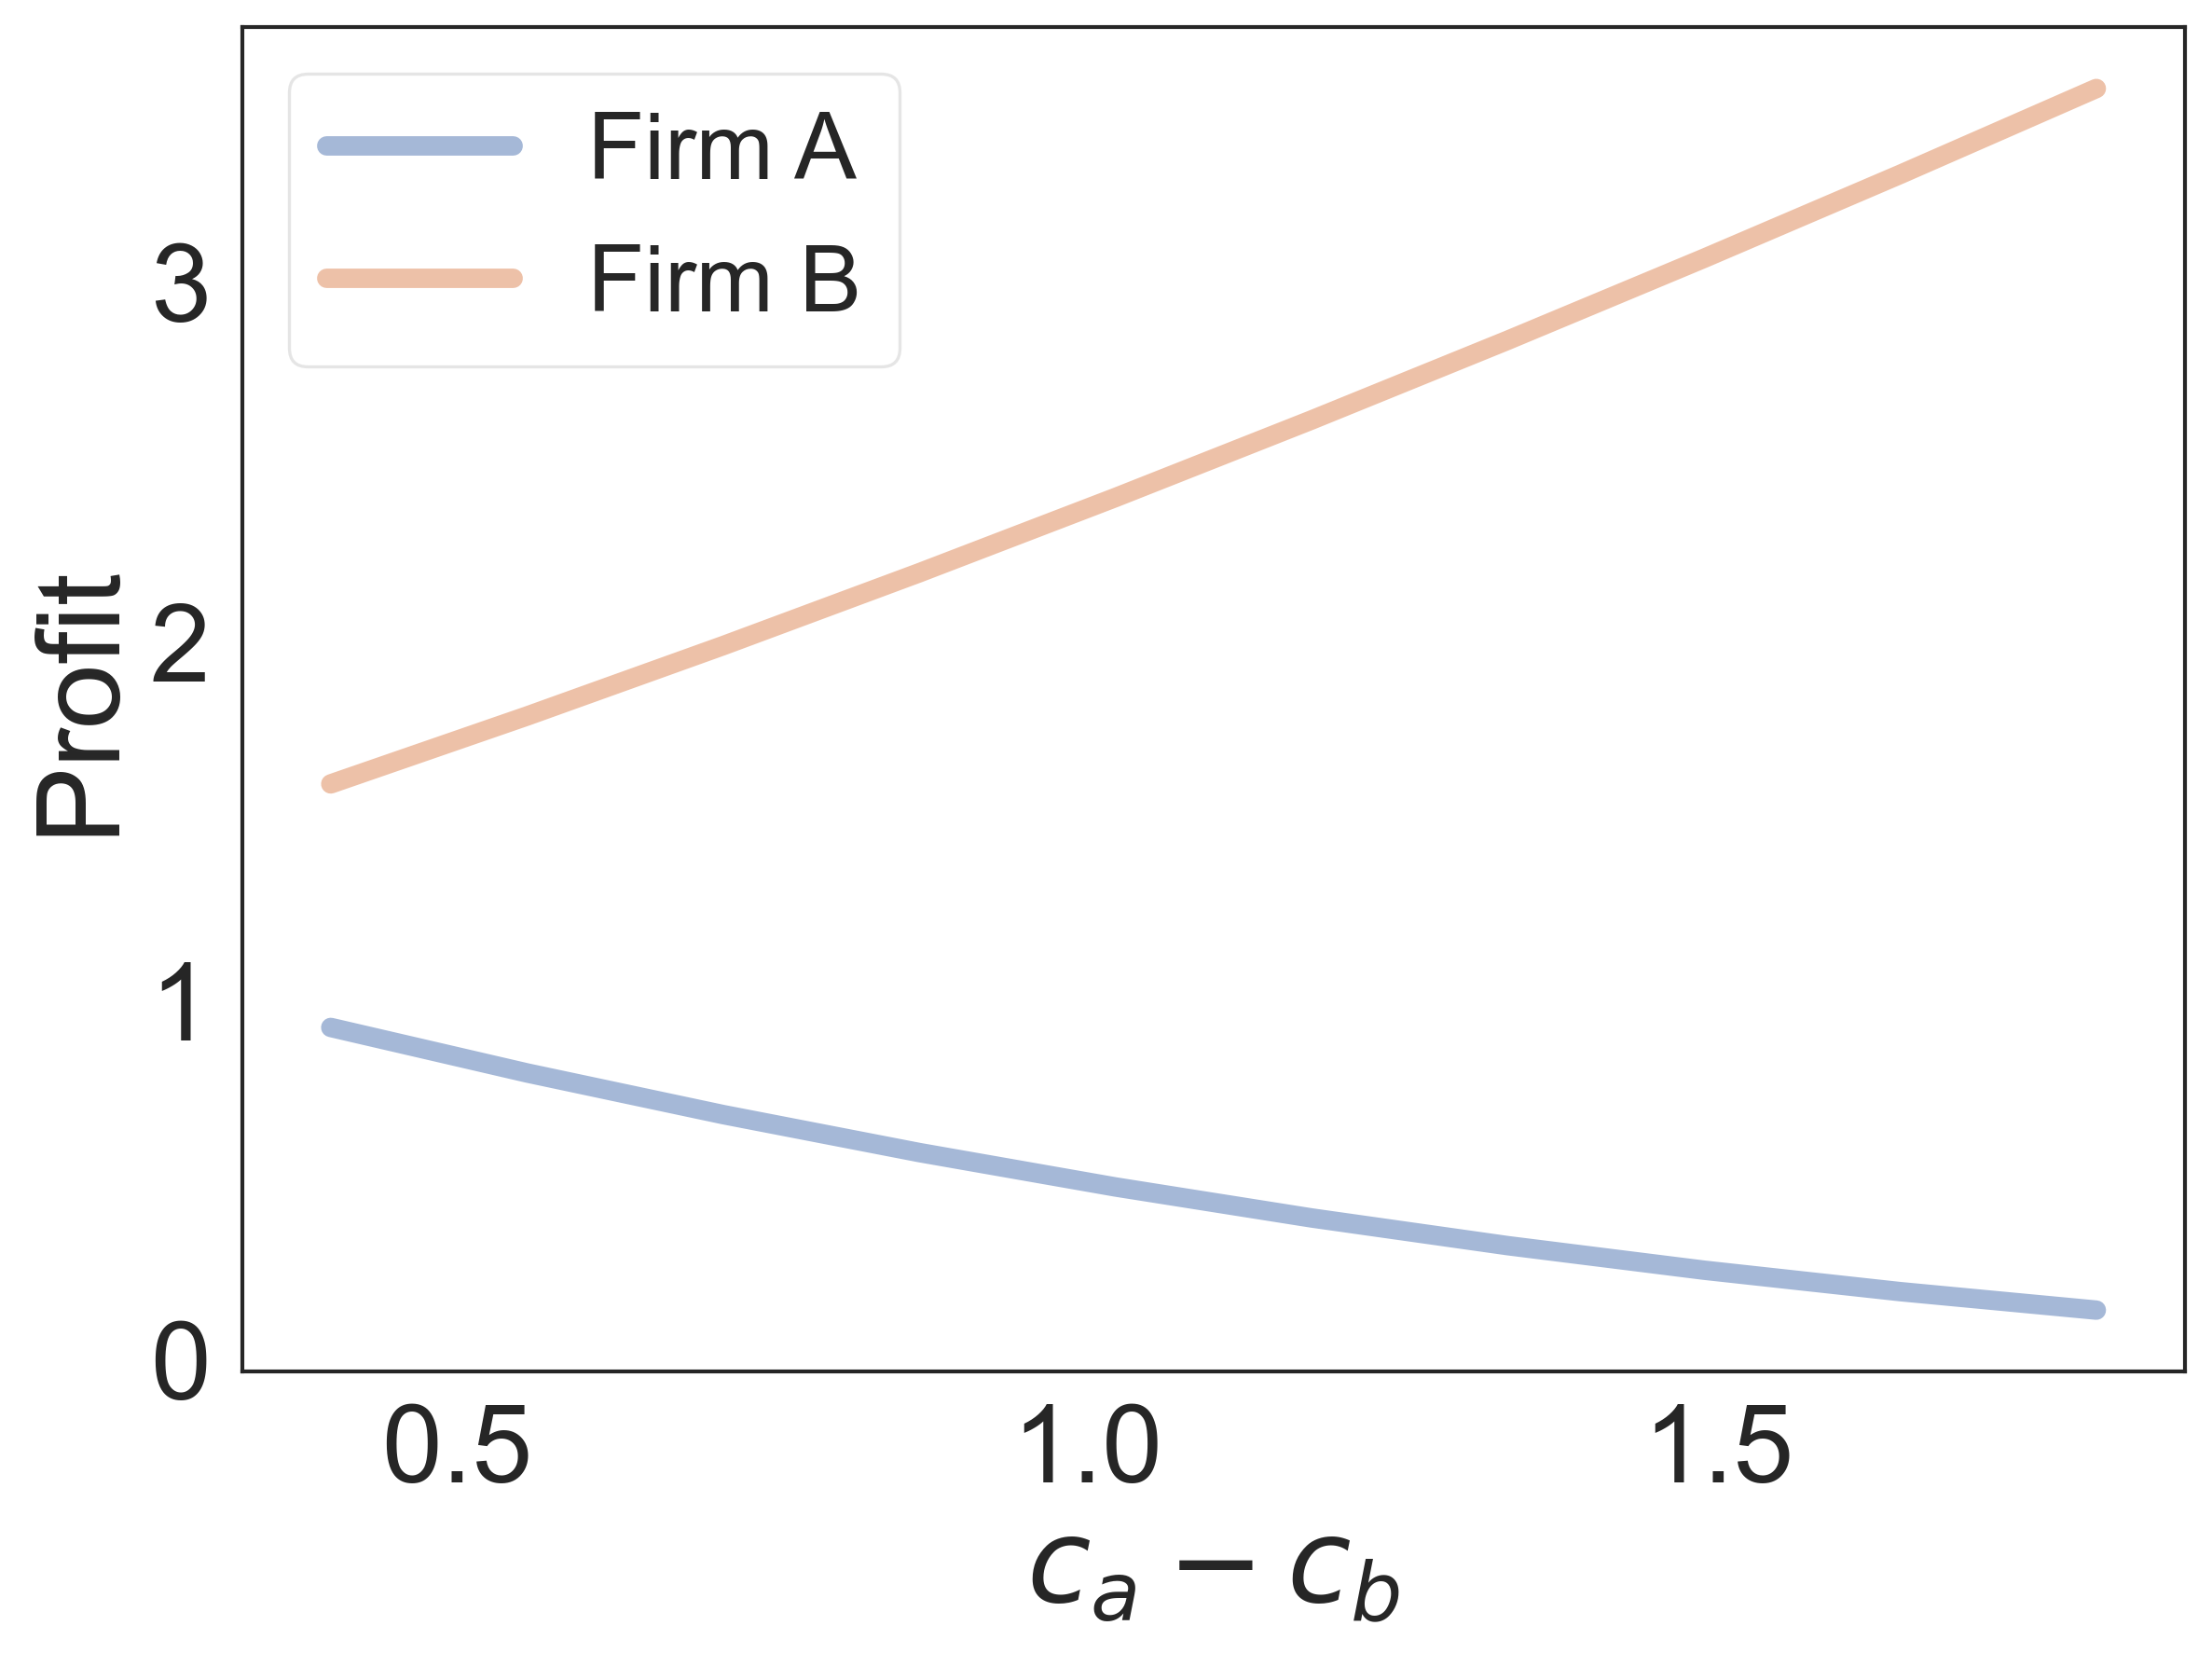

In [8]:
# plot of profits for firm A and B
labels_profit=[r'Firm A',r'Firm B']
fname_profit = "ll_ih_fm_unc_profits.png" if flag_plot else None
plot_curves_vs_camcb(df['total_profit_a'],df['total_profit_b'],ca_m_cb_arr,'Profit',labels_profit,None,None,fname_profit)

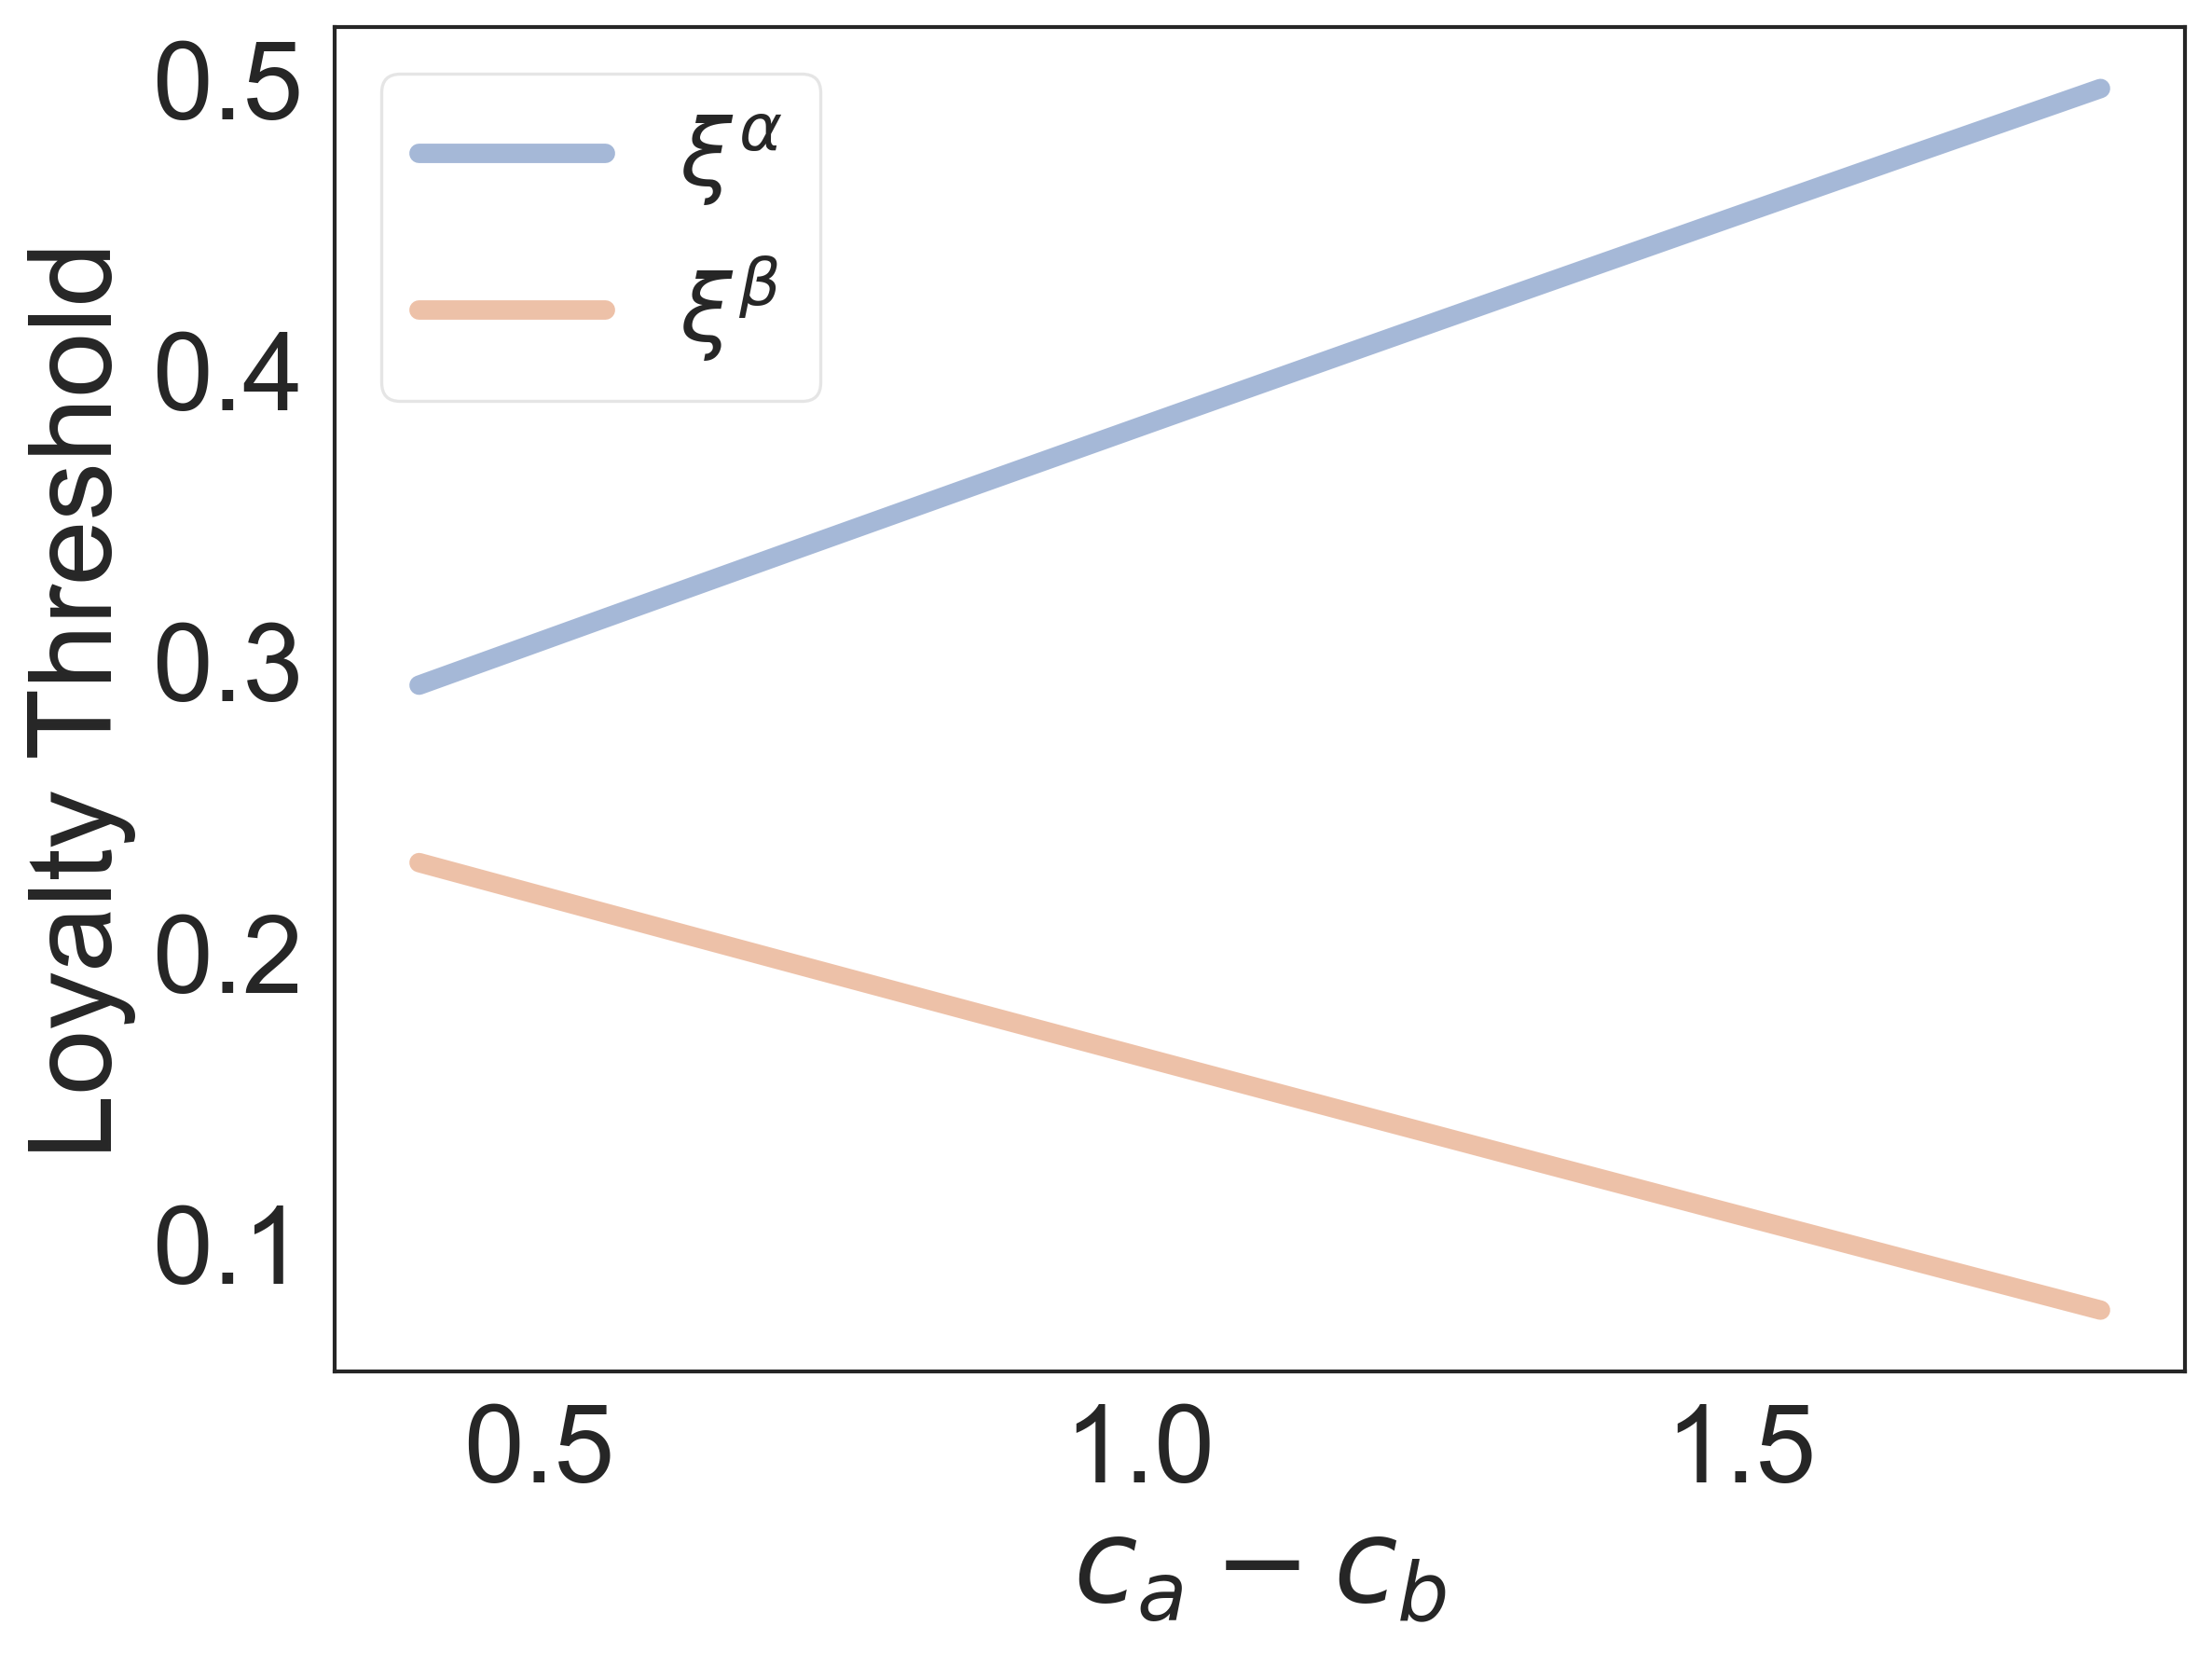

In [9]:
# plot of xia and xib
labels4=[r'$\xi^{\alpha}$',r'$\xi^{\beta}$']
fname_xis = "ll_ih_fm_unc_xis.png" if flag_plot else None
plot_curves_vs_camcb(df['xia'],df['xib'],ca_m_cb_arr,'Loyalty Threshold',labels4,None,None,fname_xis)

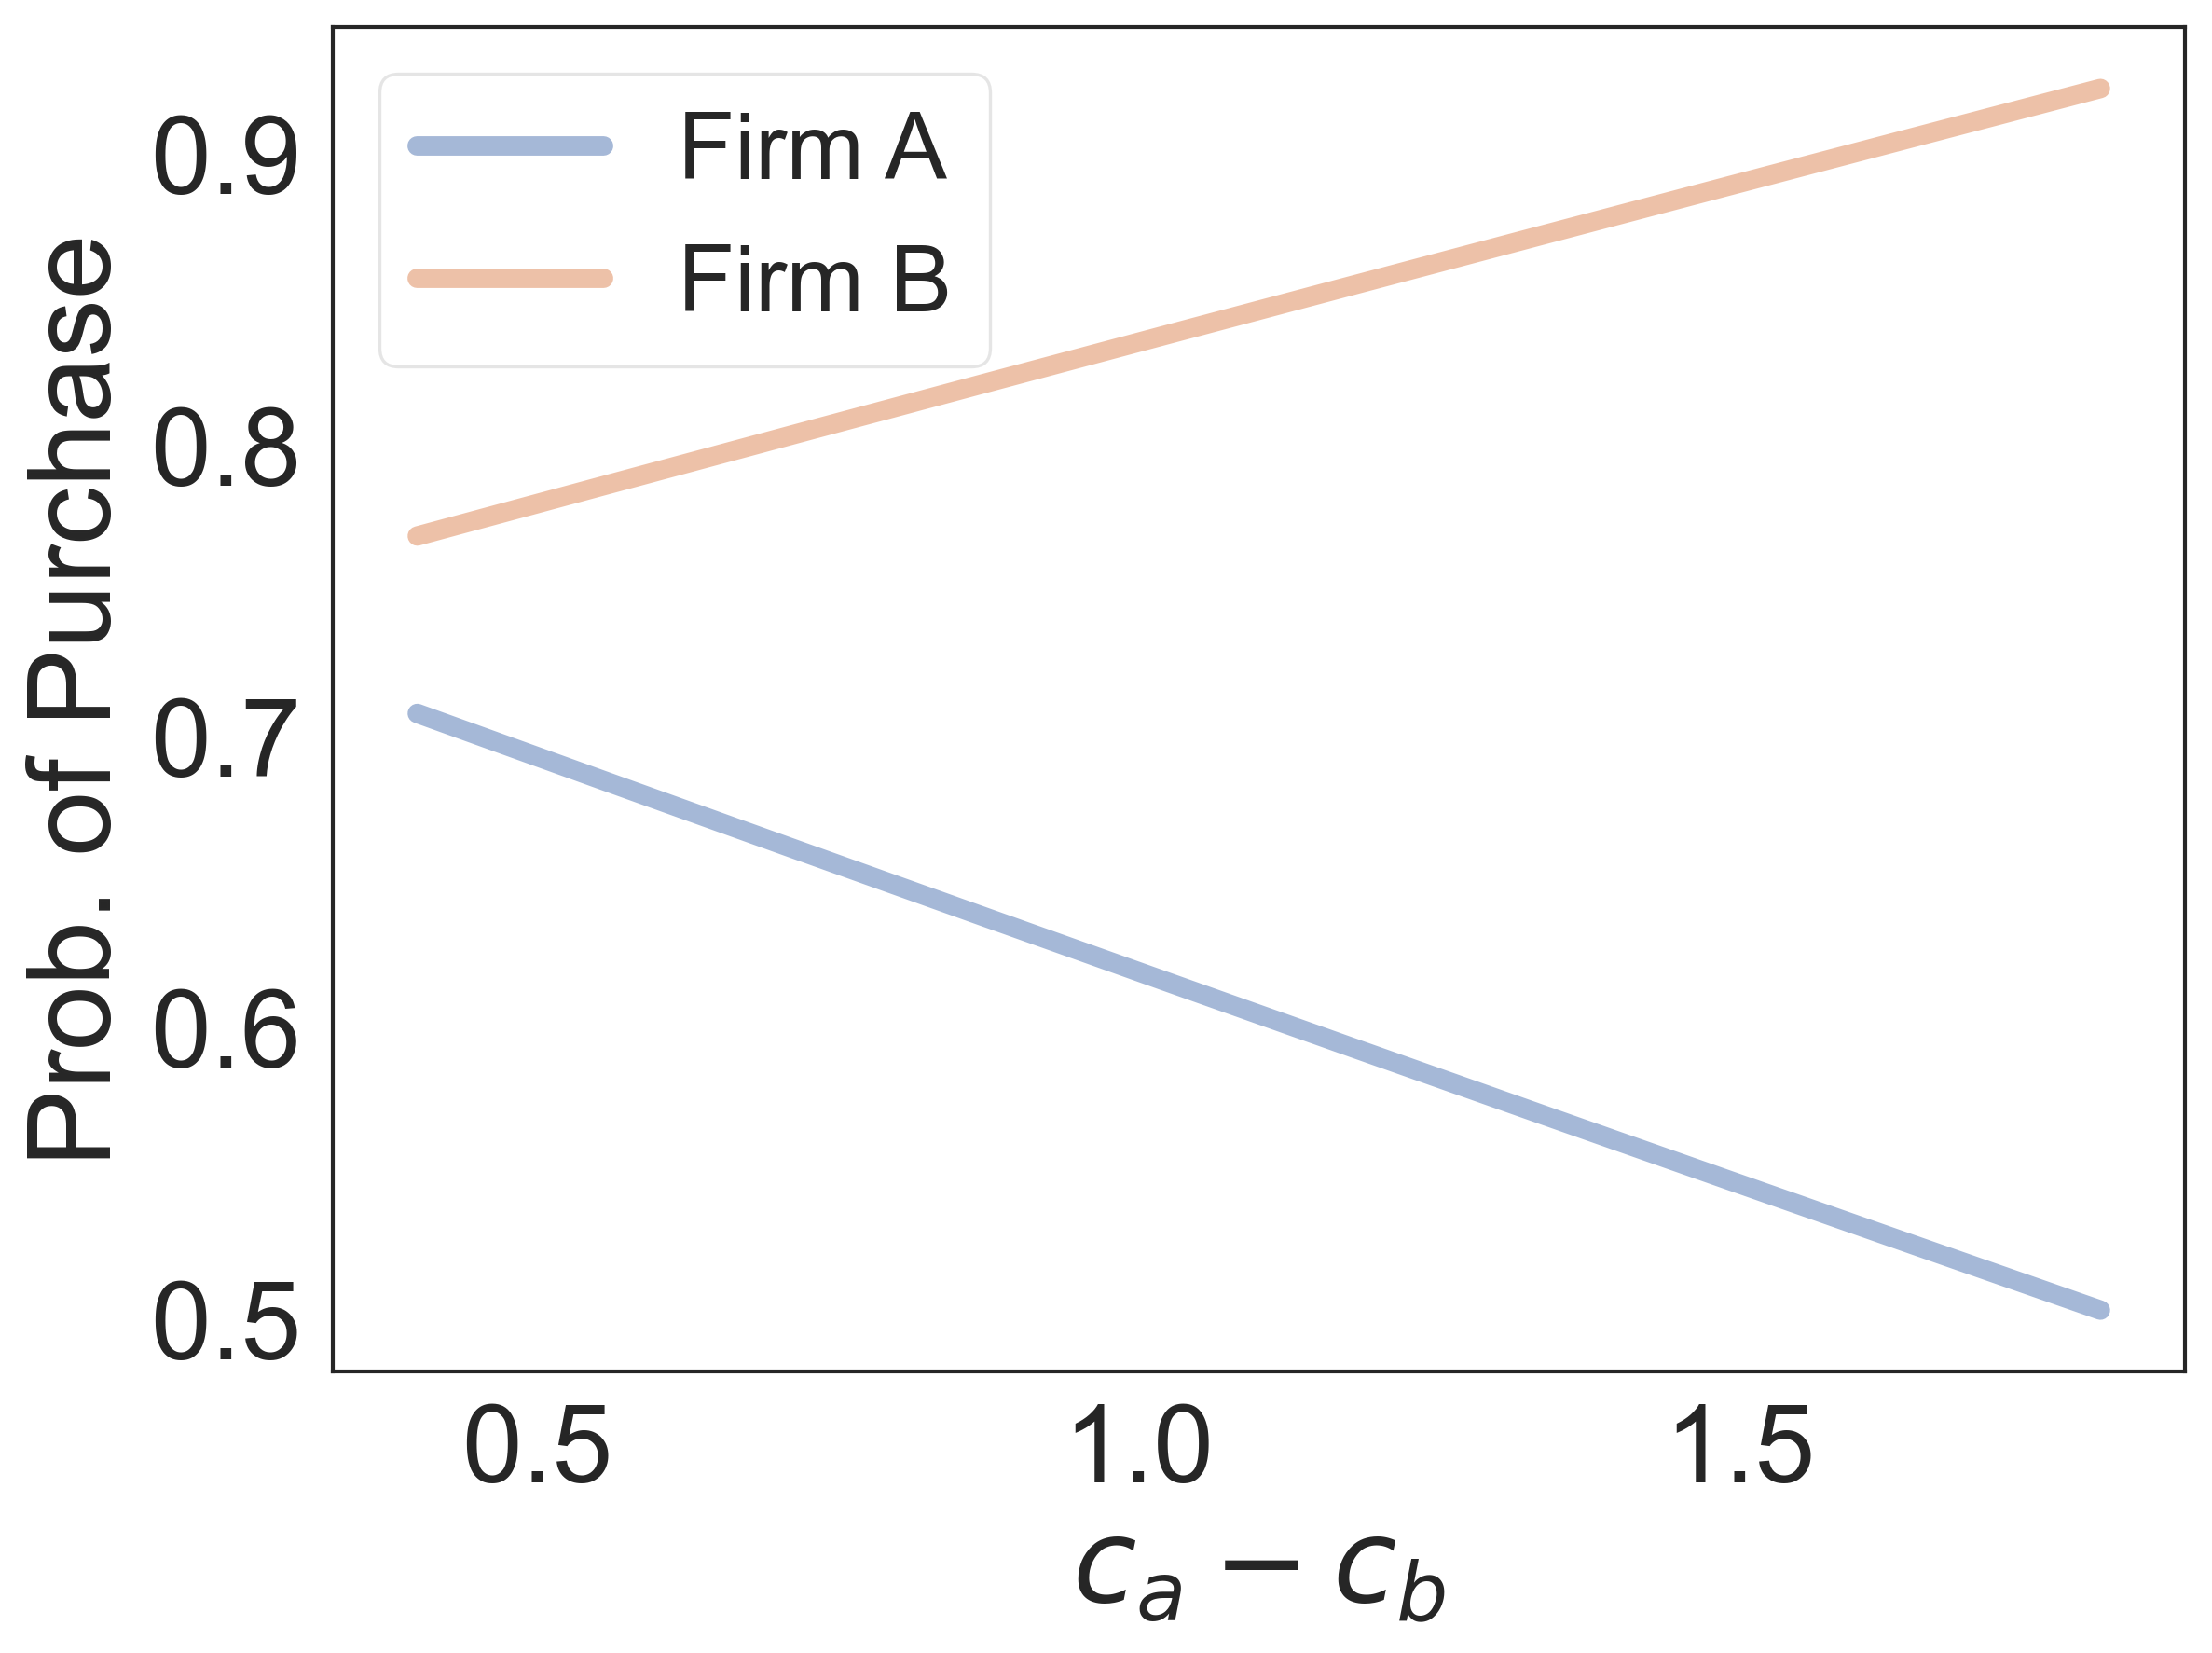

In [10]:
# plot of prob of purchase of loyal
labels_probabilities=[r'Firm A',r'Firm B']
fname_probabilities = "ll_ih_fm_unc_probabilities.png" if flag_plot else None
plot_curves_vs_camcb(df['prob_purchase_a_from_a'],df['prob_purchase_b_from_b'],ca_m_cb_arr,'Prob. of Purchase',labels_probabilities,None,None,fname_probabilities)

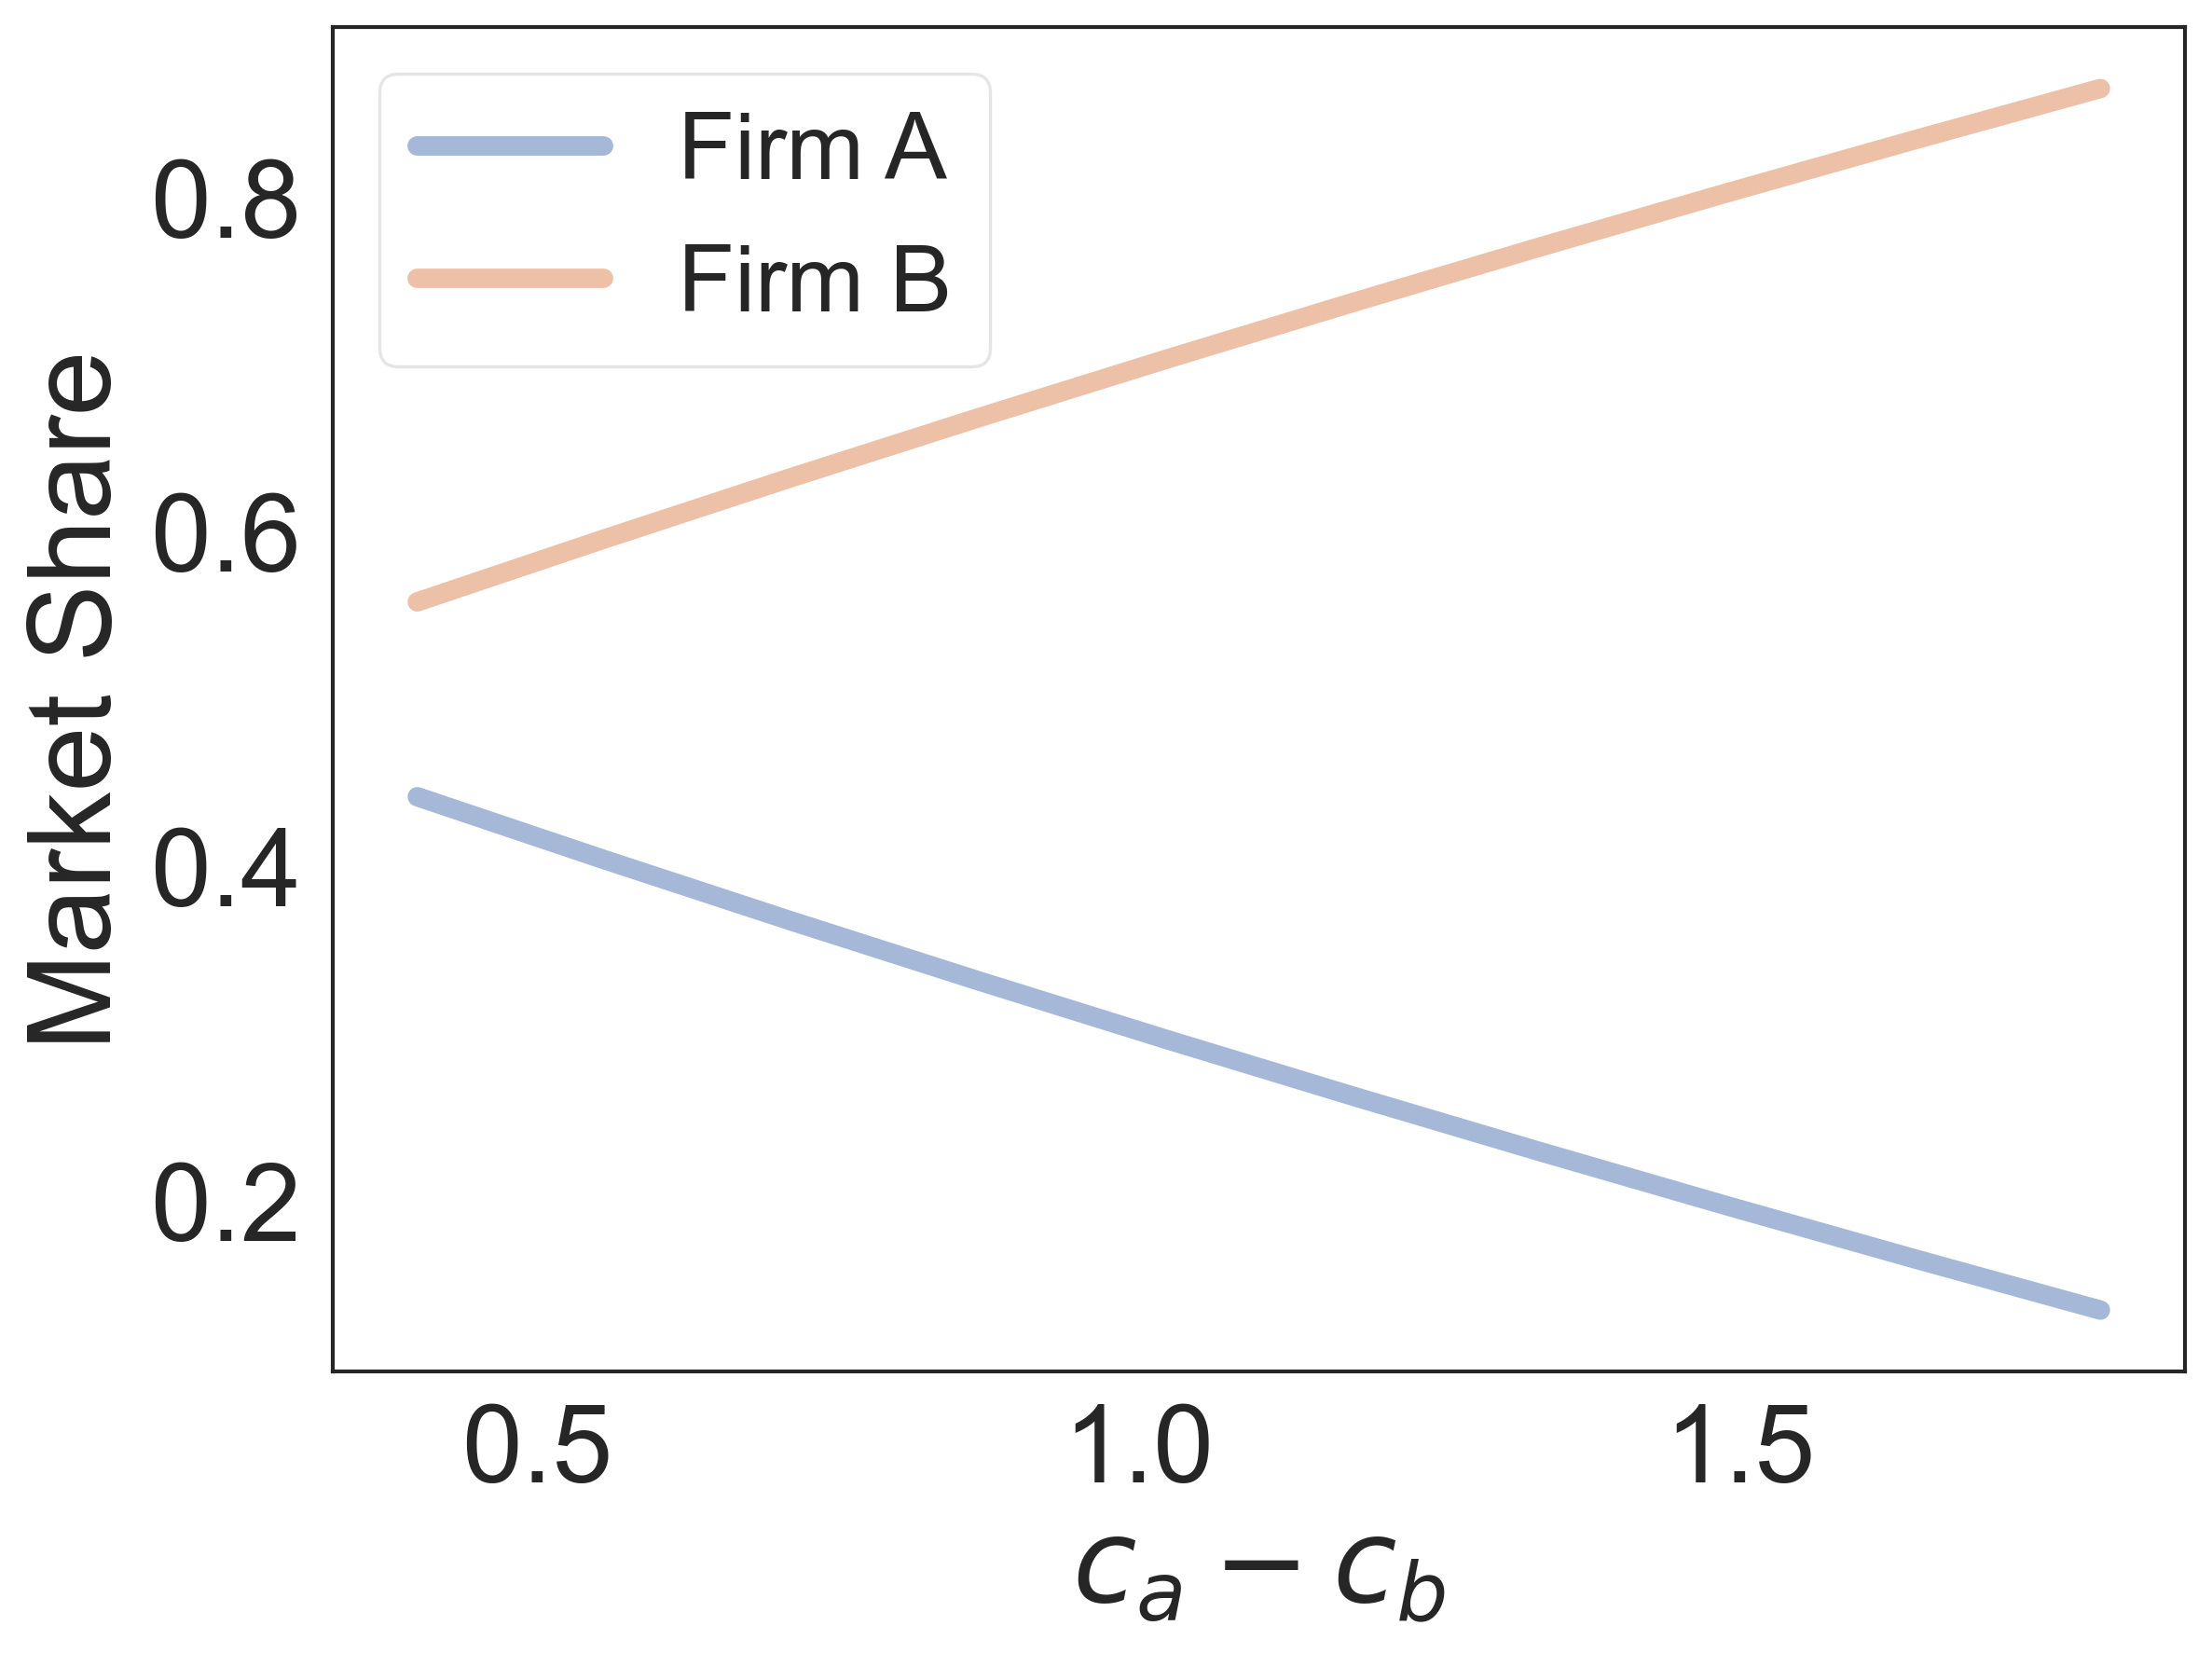

In [11]:
# plot of market share
labels_mkt=[r'Firm A',r'Firm B']
fname_mkt = "ll_ih_fm_unc_mkt.png" if flag_plot else None
plot_curves_vs_camcb(df['marketshare_a'],df['marketshare_b'],ca_m_cb_arr,'Market Share',labels_mkt,None,None,fname_mkt)